# Regression is Prediction

## Linear Regression

You all know the equation for a line, $y = mx+b$, or in the language of ML $f(x) = mx+b$. Two points are "produced" by $f(x)$:

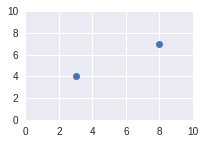

In [1]:
# LAMBDA SCHOOL
# 
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import matplotlib.pyplot as plt

x = [3,8]
y = [4,7]

def plot_two(x, y):

    plt.figure(figsize=(3,2))
    plt.plot(x,y,'o')
    plt.xlim(0,10)
    plt.ylim(0,10)

plot_two(x, y)

It is easy to solve $f(x) = mx+b$ for the above two points. We don't have to! There are many implementations of linear regression in the `python` universe.

In [0]:
p = np.polyfit(x,y,1)

So, $f(x) = \frac{3}{5}x + 2\frac{1}{5}$

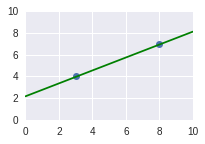

In [3]:
# Really weird - the line drawn in this graph doesn't quite intersect the points
# how I expected. I tweaked the values to make it suit my Mark-One-Eyeball
# better. I suspect that the discrepancy is actually caused by the graph.
def f(x):
    return 0.595*x + 2.16
plot_two(x, y)
xs = np.linspace(0,10,11)
plt.plot(xs,f(xs),c='g');

## Co-Linearity

The above two points we used to generate $f(x)$ lie on the same line. Any pair of points lie on the same line - a line is defined by two points. Every other point on the line is co-linear with the first two. If we had three points all defined by $f(x)$, the result of `np.polyfit` would be the same.

What about when the points are not co-linear, but instead are merely covariant?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


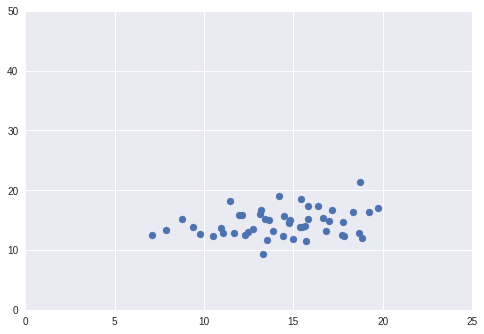

In [4]:
def plot_many(points):
    plt.scatter(*points.T)
    plt.xlim(0,25)
    plt.ylim(0,50)
    
points = np.random.multivariate_normal([15,15],[[12,6],[1,6]],50)
plot_many(points)

In [5]:
x, y = points.T
p2 = np.polyfit(x,y,1)
print(p2)

[ 0.19056653 11.78542349]


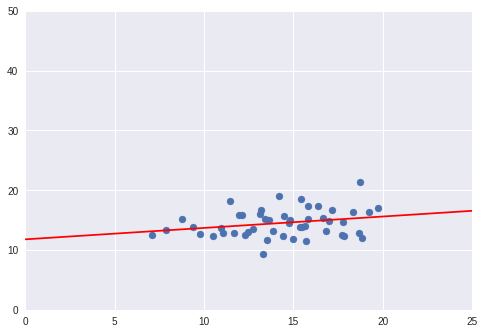

In [6]:
def f2(x):
    return p2[0] * x + p2[1]
plot_many(points)
nx = np.linspace(0,25,26)
plt.plot(nx,f2(nx),c='r');
  

# Regression by Gradient Descent

Linear regression is implemented by a multitude of libraries:

[A bunch of ways](https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b)

You will never need to implement linear regression by hand, except right now! Linear regression is great because it has an analytic solution to the system of equations $Ax = b$, which can be computed via matrix multiplies:

$x = (A^TA)^{-1}A^Tb$

However, it is also trivial to compute the same solution via gradient descent. Remember those function gradients we studied at the beginning of class?



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


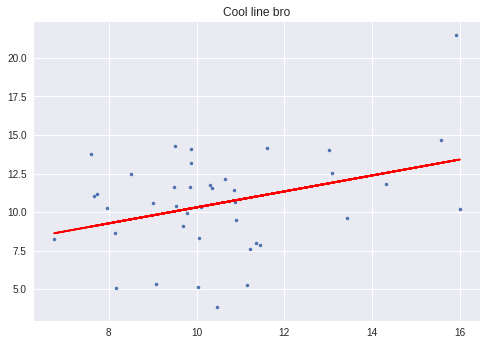

In [7]:
points = np.random.multivariate_normal([10,10],[[10,10],[0,10]],40)
x,y = points.T
solution = np.polyfit(x,y,1)
plt.plot(x,y,marker='.',lineStyle="None");
plt.plot(x,x*solution[0] + solution[1],c='r');
plt.title('Cool line bro');

The solution is just a pair of scalars, $m$ and $b$. What if we pick them at random?

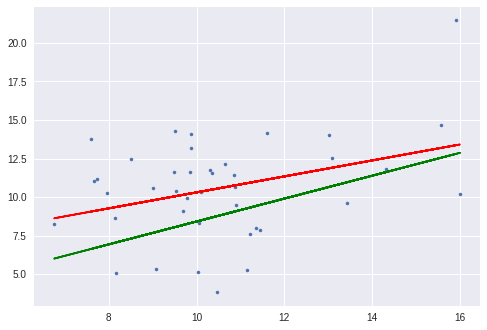

In [8]:
m = np.random.random()
b = np.random.random()

# How is this solution?
plt.plot(x,y,marker='.',lineStyle="None");
plt.plot(x,x*solution[0] + solution[1],c='r');
plt.plot(x,m*x + b,c='g');

## Root-mean Squared Error (RMSE)

RMSE is the most common "loss function", that is, a way of measuring the error in a model prediction. The error of a prediction is the difference between the values it predicted and the values that were expected.

RMSE is calculated:

$RMSE = \sqrt{\frac{\sum_{t=1}^T \left( \hat{y_t} - y_t \right) ^2}{T}}$

$\hat{y_t}$ is the prediction of the model for a particular sample $t$. $y_t$ is the true label for sample $t$.

Linear regression is the proess of minimizing the least-squared error between the line-of-regression and the sample points.

If we calculate `polyfit` as above using `full=True`, it will return the error of the model computed by polyfit.

In [9]:
coefficients, residual, solution_rank, solution_singular_values, rcond_epsilon = np.polyfit(x,y,1,full=True)
print(coefficients)
print(residual)
print(solution_rank)
print(solution_singular_values)
print(rcond_epsilon)

[0.5176806  5.12747689]
[371.15112768]
2
[1.40663078 0.1462527 ]
8.881784197001252e-15


Of particular interest here is the residual - this number is the MSE of the solution returned by `polyfit`. Can we reproduce it?

What about the residual of the line we just guessed at?

---



In [10]:
confirm_residual = np.sum((x*coefficients[0] + coefficients[1] - y)**2)
print(confirm_residual)

random_residual = np.sum((x*m+b-y)**2)
print(random_residual)

371.15112767623697
506.5687005771543


### Loss function

The goal of gradient descent is to minimize the loss function - in this case, the loss function being RMSE of our estimated line. Without `polyfit`, we'd try to minimize the loss function all the way to 0, but `polyfit` has already calculated the best possible result! $MSE = 419$, $RMSE = \sqrt{419}$.

## Gradient Descent

`polyfit` determined that the best possible solution for $f(x) = mx+b$ is `coefficients[0] * x + coefficients[1]`. For any other value of `m` and `b`, the error (or RMSE), will be larger. The error function, RMSE is $\sqrt(mx+b-y)^2$

[0.5176806  5.12747689]


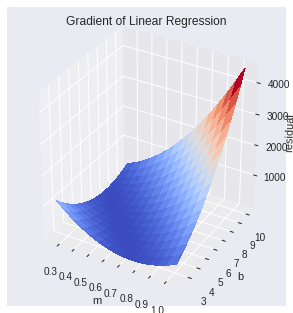

In [11]:
def mse(x,prediction_m,prediction_b,true_m,true_b):
    width = len(prediction_m)
    height = len(prediction_m[0])
    result = np.zeros(width*height).reshape(width,height)
    for row in range(width):
        for col in range(height):
            # calculate the RMSE of prediction_m/b, store in result
            m = prediction_m[row][col]
            b = prediction_b[row][col]
            result[row][col] = np.sum(((x*m+b)-(x*true_m+true_b))**2)
    return result

m_range = np.linspace(coefficients[0]*0.5, 2*coefficients[0], 15)
b_range = np.linspace(coefficients[1]*0.5, 2*coefficients[1], 15)
mm, bb = np.meshgrid(m_range,b_range)
Z = mse(x,mm,bb,coefficients[0],coefficients[1])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import numpy as np

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(mm, bb, Z,  cmap=cm.coolwarm,\
                       linewidth=0, antialiased=False)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('residual')
ax.set_title('Gradient of Linear Regression');
print(coefficients)

### Gradient Descent by Partial Derivative

The error function $E_{rms} = \sum{\sqrt{(\hat y_i - y_i)^2}}$ is differentiable: that is, we can find the derivative of the error function, which informs us how to update the parameters to minimize it. A model with zero error is perfect.

One of the foundations of machine learning is taking the partial derivative of the error function. When the error function is well defined like above, the gradient can be computed analytically. When it is not well defined, it can be computed using the method of finite differences which we studied in week 1. Lets drop the $\sqrt{}$ to make the derivative easier:

$E_{rms} = \sum{(\hat y_i - y_i)^2} = \sum{(mx_i + b - y_i)^2}$

We can't drop the $^2$, because that's what makes this a minimization problem.

We have two variables $m$ and $b$ that we'd like to solve for:

$\frac{\partial}{\partial m} = -2\sum x(mx_i + b - y)$

$\frac{\partial}{\partial b} = -2\sum (mx_i + b - y)$

See
* [ML Cheatsheet](http://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html)

and
* [MCCormickML](http://mccormickml.com/2014/03/04/gradient-descent-derivation/)

(0.9395646833921867, 0.4946374653798378, 10.187165644142938)


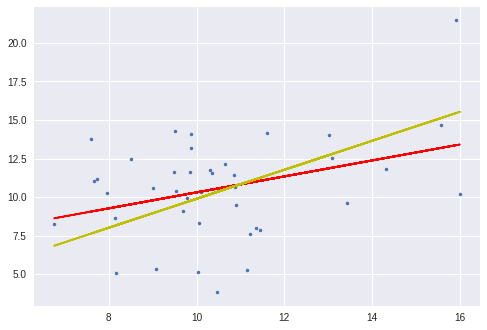

In [12]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=10000, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost

m_solution = linear_regression(x, y)
print(m_solution)
plt.plot(x,y,'o',marker='.')
plt.plot(x,x*solution[0]+solution[1],c='r')
plt.plot(x,x*m_solution[0]+m_solution[1],c='y');

# Your Assignment

Use gradient descent on the Titanic dataset.

* 1) Load and clean the data
* 1.1) Pay special attention to outliers. How will your model perform with and without outliers?
* 2) Identify which features have continuous numeric values
* 3) Compute the linear regression of these values (there are only two predictable labels)
* 3.1) Choose a set of features (columns) from Titanic and see which features minimize your RMSE
* 4) Report on your RMSE (residual error) for each of the models that you produce.
Linear regression works well with univariate data (that is, $dim(x) = 1 \times n$ and $dim(y) = 1 \times n$) or with multivariate data: $dim(x)) = m\times n$. Report your best regression selected from the data in the univariate case and the multivarate case. How do they differ?
* 5) Would this model successfully produce good predictions on the chosen labels?

# Thinking about your assignment

1) What am I being asked to do?

Perform feature selection where the selection criteria is the minimum RMSE that a linear regression algorithm will find. Do this for the univariate case - in some sense answering which feature has the most signal, assuming a linear relationship - and for the multivariate case.

For this assignment, the labels I will try to predict will be the two continuous variables: `fare` and `age`. Note that this is different from the canonical label that models typically try to predict - `survived`.

2) What coding steps need to be taken to satisfy the problem?

The common data preparation steps - dropping duplicates, treating missing values, normalizing data if appropriate, followed by linear regression on the continuous variables - `fare` and `age` - and error calculation for all combinations of features.

3) What must I do to claim that I have "completed" the assignment?

* Relate subsets of Titanic features to the RMSE of a linear model for the two continuous labels
* Identify the feature that produces the model with least RMSE out of all sets of single features
* Identify the set of features that produce the model with the least RMSE out of all possible sets of features
* Discuss the quality of the predictions for the best models found
* Repeat the above analysis on two versions of the dataset, one without outliers and one with

In [0]:
# Complete assignment here.

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from itertools import chain, combinations

## Load and Preprocess Data

In [14]:
data = sns.load_dataset('titanic')
data = data.drop(['alive','adult_male','who','class','embark_town', 'deck'], axis=1)
data = data.drop_duplicates()

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [0]:
def fill_mixed_median_mode(dataframe, medians=list()):
    """ Fill missing values with median for specified column, otherwise mode
    
    Args:
        dataframe (pandas.core.frame.DataFrame): rows of observations of features
        medians (list): columns to fill missing values with median instead of mode
        
    Returns:
        dataframe with no missing values
    """
    
    
    null = dataframe.isnull().any()
    null_cols = list(null[null].index)
    
    fill = pd.Series([data[c].median() if c in medians else data[c].mode()[0]
                     for c in null_cols], index=null_cols)
    
    dataframe[null_cols] = dataframe[null_cols].fillna(fill)
    return dataframe

In [0]:
data_f = fill_mixed_median_mode(data, ['Age'])

In [83]:
for label in ['embarked','sex', 'alone']:
    data_f[label] = LabelEncoder().fit_transform(data_f[label])

embarked_one_hot = OneHotEncoder().fit_transform(data_f[['embarked']]).toarray()
embarked = pd.DataFrame(embarked_one_hot, 
                        columns=['Southampton', 'Cherbourg', 'Queenstown'], 
                        dtype=np.int64)

data_f = data_f.reset_index(drop=True)
data_enc = data_f.join([embarked])
data_enc = data_enc.drop(['embarked'], axis=1)

data_enc.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,Southampton,Cherbourg,Queenstown
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,0,0,1


I will include `survived` in my set of features. My two outcomes are `age` and `fare`. Every other feature will also be considered.

## Univariate Linear Regression

In [0]:
def compare_models(data, features, outcomes):
    models = pd.DataFrame([])
    
    for feature in features:
        if type(feature) != list:
            feature = [feature]
        
        for outcome in outcomes:
            X = data[feature].values.reshape(-1, len(feature))
            Y = data[outcome].values.reshape(-1, 1)
            
            model = LinearRegression()
            model.fit(X, Y)
            yhat = model.predict(X)
            
            rmse = np.sqrt(np.sum(np.power(yhat-Y, 2))/yhat.shape[0])
            params = model.coef_[0]
            intercept, = model.intercept_
            
            summary = pd.Series([outcome, feature, rmse, params, intercept], name='')
            models = models.append(summary)
            
    models.columns = ['outcome', 'features', 'RMSE', 'parameters', 'intercept']
    
    return models

In [0]:
features = data_enc.drop(['age', 'fare'], axis=1).columns
outcomes = ['age', 'fare']

models_uni = compare_models(data_enc, features, outcomes)
models_uni = models_uni.sort_values(by='RMSE')

age_uni = models_uni[models_uni['outcome']=='age'].drop('outcome', axis=1)
fare_uni = models_uni[models_uni['outcome']=='fare'].drop('outcome', axis=1)

age_uni = age_uni.reset_index(drop=True)
fare_uni = fare_uni.reset_index(drop=True)

In [180]:
age_uni

,features,RMSE,parameters,intercept
0,[pclass],12.990932,[-5.59570358147587],41.606529
1,[sibsp],13.313729,[-3.835099969655077],31.053604
2,[alone],13.623548,[4.940804037591372],26.237929
3,[parch],13.641099,[-2.80261003080207],30.209065
4,[sex],13.785026,[2.5878315180777007],27.418664
5,[survived],13.803681,[-2.085055466652203],29.898472
6,[Cherbourg],13.814539,[-3.3096847836469556],29.283823
7,[Southampton],13.835659,[1.0332129032258077],28.832400
8,[Queenstown],13.841072,[0.318817100131655],28.805962


In [181]:
fare_uni

,features,RMSE,parameters,intercept
0,[pclass],43.536383,[-33.7905929560701],110.727978
1,[Southampton],50.210618,[36.043423809032255],27.666632
2,[survived],50.616010,[26.167851570425018],24.026482
3,[alone],50.634441,[-25.852591072050117],49.478909
4,[parch],51.267813,[11.907905797623851],29.852214
5,[Queenstown],51.355227,[-21.364438957199987],50.359411
6,[sex],51.475906,[-18.272017229957328],46.260831
7,[sibsp],51.757984,[7.094755499173945],31.099813
8,[Cherbourg],51.916804,[-21.766692716591844],36.447657


It seems that for both `age` and `fare`, `pclass` is the feature that produces the model with the least RMSE. However, one should keep in mind that this is on unnormalized data. A better metric for the quality of a linear model would be its $R^2$ score.

## Multivariate Linear Regression

In [0]:
def all_subsets(data_cols):
    return chain(*map(lambda x: combinations(data_cols, x), range(0, len(data_cols)+1)))

In [150]:
subsets = [list(subset) for subset in all_subsets(features) if len(subset) > 0]
subsets[:15]

[['survived'],
 ['pclass'],
 ['sex'],
 ['sibsp'],
 ['parch'],
 ['alone'],
 ['Southampton'],
 ['Cherbourg'],
 ['Queenstown'],
 ['survived', 'pclass'],
 ['survived', 'sex'],
 ['survived', 'sibsp'],
 ['survived', 'parch'],
 ['survived', 'alone'],
 ['survived', 'Southampton']]

In [0]:
models = compare_models(data_enc, subsets, outcomes)

In [0]:
age = models[models['outcome']=='age'].drop('outcome', axis=1)
fare = models[models['outcome']=='fare'].drop('outcome', axis=1)

age = age.reset_index(drop=True).sort_values(by='RMSE')
fare = fare.reset_index(drop=True).sort_values(by='RMSE')

In [184]:
age.head()

,features,RMSE,parameters,intercept
501,"[survived, pclass, sex, sibsp, parch, alone, S...",12.177857,"[-5.913804363437605, -6.641632079511652, -0.37...",48.431112
503,"[survived, pclass, sex, sibsp, parch, alone, C...",12.177857,"[-5.9138043634376, -6.6416320795116555, -0.379...",46.711687
502,"[survived, pclass, sex, sibsp, parch, alone, S...",12.177857,"[-5.913804363437602, -6.641632079511665, -0.37...",48.529593
465,"[survived, pclass, sex, sibsp, parch, alone, S...",12.177882,"[-5.913502548134916, -6.635719476214061, -0.38...",48.429045
480,"[survived, pclass, sibsp, parch, alone, Southa...",12.178795,"[-5.728924147126569, -6.6309154860061525, -3.0...",48.108165


In [185]:
age['features'].iloc[0]

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'alone',
 'Southampton',
 'Cherbourg']

In [186]:
fare.head()

,features,RMSE,parameters,intercept
503,"[survived, pclass, sex, sibsp, parch, alone, C...",40.845907,"[2.473702980674779, -32.34607958777646, -3.466...",1.155424e+02
502,"[survived, pclass, sex, sibsp, parch, alone, S...",40.845907,"[2.473702980674775, -32.34607958777646, -3.466...",1.018592e+02
501,"[survived, pclass, sex, sibsp, parch, alone, S...",40.845907,"[2.4737029806747426, -32.34607958777645, -3.46...",9.524160e+01
510,"[survived, pclass, sex, sibsp, parch, alone, S...",40.847295,"[2.691872385822584, -32.264552288864024, -3.52...",6.478185e+14
468,"[survived, pclass, sex, sibsp, parch, Southamp...",40.848870,"[2.368789402786627, -32.25057413338287, -3.324...",9.617655e+01


In [187]:
fare['features'].iloc[0]

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'alone',
 'Cherbourg',
 'Queenstown']

For both `fare` and `age`, a model that considered 8 features obtained the lowest RMSE. These are the features `survived`, `pclass`, `sex`,  `sibsp`, `parch` and `alone` along with two out of the three cities. Interestingly, the cities are not the same for predicting each outcome.

In the future, I could consider including one less one-hot feature than was encoded, since its information is completely contained in the baseline case of all the other one-hot features being equal to zero. This would remedy the "dummy variable trap" contributing to [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity).

## Discussion

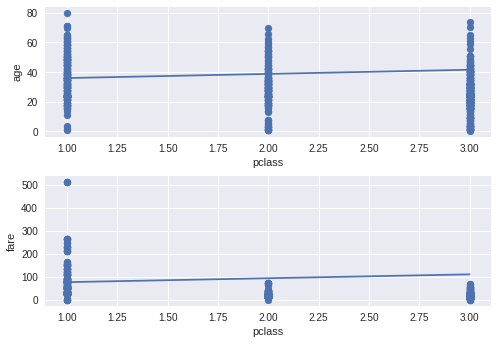

In [193]:
fig, ax = plt.subplots(2)
fig.subplots_adjust(hspace=0.3)

for ix, outcome in enumerate(outcomes):
    line = models_uni[models_uni['outcome']==outcome].iloc[0]
    feature = line['features'][0]
    
    x = data_enc[feature]
    y = data_enc[outcome]
    ax[ix].scatter(x, y)
    x_line = np.linspace(x.min(), x.max())
    y_line = x_smooth*line['parameters'][0] + line['intercept']
    ax[ix].plot(x_line, y_line)
    
    ax[ix].set(xlabel=feature, ylabel=outcome);

Because `pclass` is a categorical variable, a linear model that regresses onto `fare` or `age` using it as a feature will not have very much predictive power. Though the multivariable regression models cannot be visualized in the same way, one would expect that the same holds true for them.

It is apparent that all the model is really doing is finding a line that gets as close as possible to the means of each level in the categorical variable. Removing the outliers would simply improve the model's ability to pass through the means, and would not lend much of an increase in predictive power.

## Stretch Goal

Lets get started on Kaggle.

[House Prices Advanced Regression](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Sign up to compete, and download the dataset! The Zillow data contains a huge number of columns. Spend an hour or two studying the data, cleaning it, and configuring it, then work to use `polyfit` (remember, it is your first ML model) to make predictions about the final column `SalePrice`.
